## Multi Linear regression

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Importing the dataset

In [2]:
df = pd.read_csv("50_Startups.csv")
data = df.iloc[:, [0,1,2,4]]


## EDA

In [3]:
data = data.rename(columns = {"R&D Spend" :"RD","Administration":"Adm","Marketing Spend":"Mkt" })

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   Adm     50 non-null     float64
 2   Mkt     50 non-null     float64
 3   Profit  50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [5]:
data.describe()

,RD,Adm,Mkt,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data[data.duplicated()] ## no duplicates present

,RD,Adm,Mkt,Profit


In [7]:
data.isna().sum()

RD        0
Adm       0
Mkt       0
Profit    0
dtype: int64

## Correlation Analysis

In [8]:
data.corr()

,RD,Adm,Mkt,Profit
RD,1.000000,0.241955,0.724248,0.972900
Adm,0.241955,1.000000,-0.032154,0.200717
Mkt,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


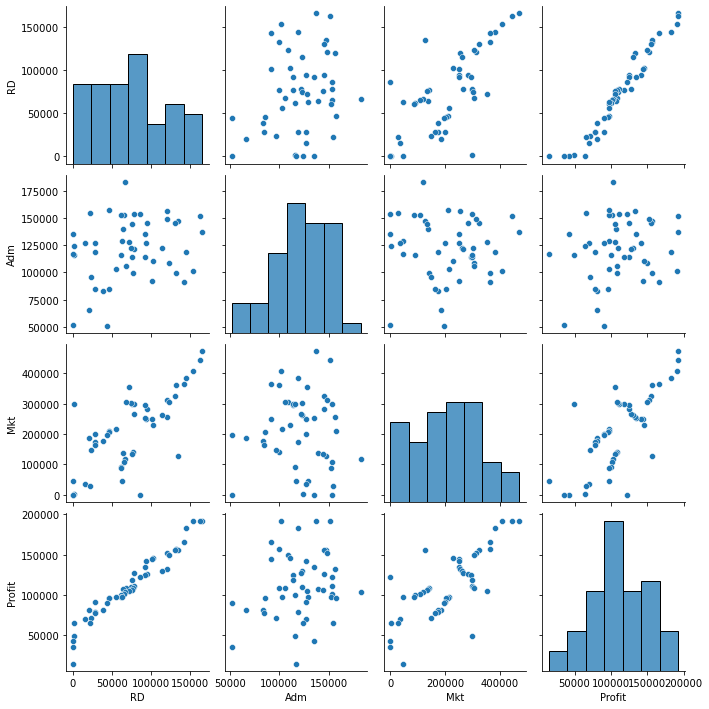

In [9]:
sns.pairplot(data)

## Model buildings

In [10]:
import statsmodels.formula.api as smf    
model = smf.ols('Profit~RD+Adm+Mkt', data=data).fit()

## Model testing

In [11]:
model.params  ## Finding Coefficient parameters

Intercept    50122.192990
RD               0.805715
Adm             -0.026816
Mkt              0.027228
dtype: float64

In [12]:
print(model.tvalues, "\n" ,model.pvalues ) # finding t_values and p_values

Intercept     7.626218
RD           17.846374
Adm          -0.525507
Mkt           1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
Adm          6.017551e-01
Mkt          1.047168e-01
dtype: float64


In [13]:
model.rsquared, model.rsquared_adj # find r2_value and r2_adj_value

(0.9507459940683246, 0.9475337762901719)

In [14]:
m1 = smf.ols('Profit~RD', data=data).fit()
print(m1.tvalues, "\n", m1.pvalues)  ## RD have significant pvalues

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [15]:
m2 = smf.ols('Profit~Adm', data=data).fit()
print(m2.tvalues, "\n", m2.pvalues) ## Adm has in-significant pvalue

Intercept    3.040044
Adm          1.419493
dtype: float64 
 Intercept    0.003824
Adm          0.162217
dtype: float64


In [16]:
m3 = smf.ols('Profit~Mkt', data=data).fit()
print(m3.tvalues, "\n", m3.pvalues) ## Mkt have significant pvalues

Intercept    7.808356
Mkt          7.802657
dtype: float64 
 Intercept    4.294735e-10
Mkt          4.381073e-10
dtype: float64


In [17]:
m4 = smf.ols('Profit~Adm+Mkt', data=data).fit()
print(m4.tvalues, "\n", m4.pvalues)  ## when we consider Adm and Mkt at once we got significant pvalues

Intercept    1.142741
Adm          2.467779
Mkt          8.281039
dtype: float64 
 Intercept    2.589341e-01
Adm          1.729198e-02
Mkt          9.727245e-11
dtype: float64


## Model Validation

## 1. Collinearity Check

In [18]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_m1 = smf.ols("RD~Mkt+Adm", data=data).fit().rsquared
vif1 = 1/(1-rsq_m1**2)

rsq_m2 = smf.ols("Mkt~RD+Adm", data=data).fit().rsquared
vif2 = 1/(1-rsq_m2**2)

rsq_m3 = smf.ols("Adm~RD+Mkt", data=data).fit().rsquared
vif3 = 1/(1-rsq_m3**2)

d1 ={'variables':["Rd","Adm","Mkt"],'vif':[vif1, vif2, vif3]}
VIF_frame = pd.DataFrame(d1)
VIF_frame

,variables,vif
0,Rd,1.547939
1,Adm,1.481813
2,Mkt,1.022706


In [19]:
# all variables VIF<20, No Collinearity, so consider all varaibles

## 2) Residual Analysis

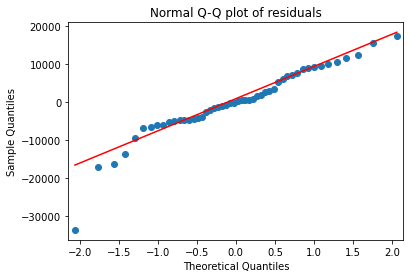

In [20]:
import statsmodels.api as sm
sm.qqplot(model.resid,line ='q')
plt.title("Normal Q-Q plot of residuals")
plt.show();

In [21]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [22]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

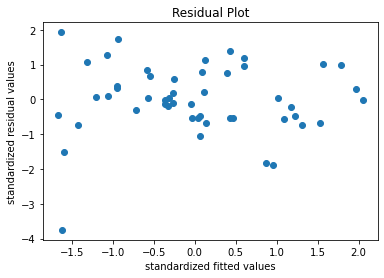

In [23]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

eval_env: 1


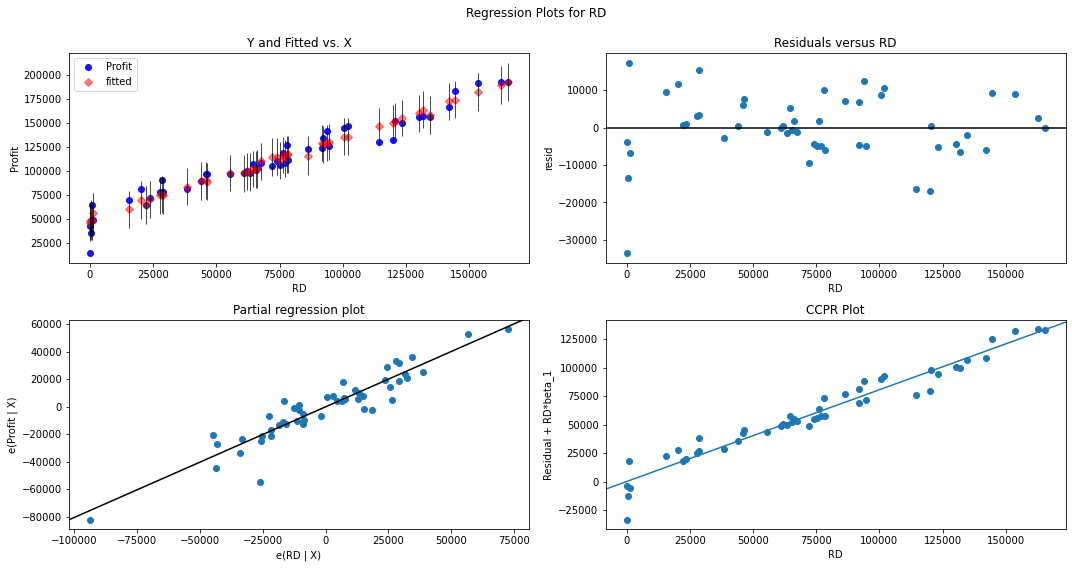

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

eval_env: 1


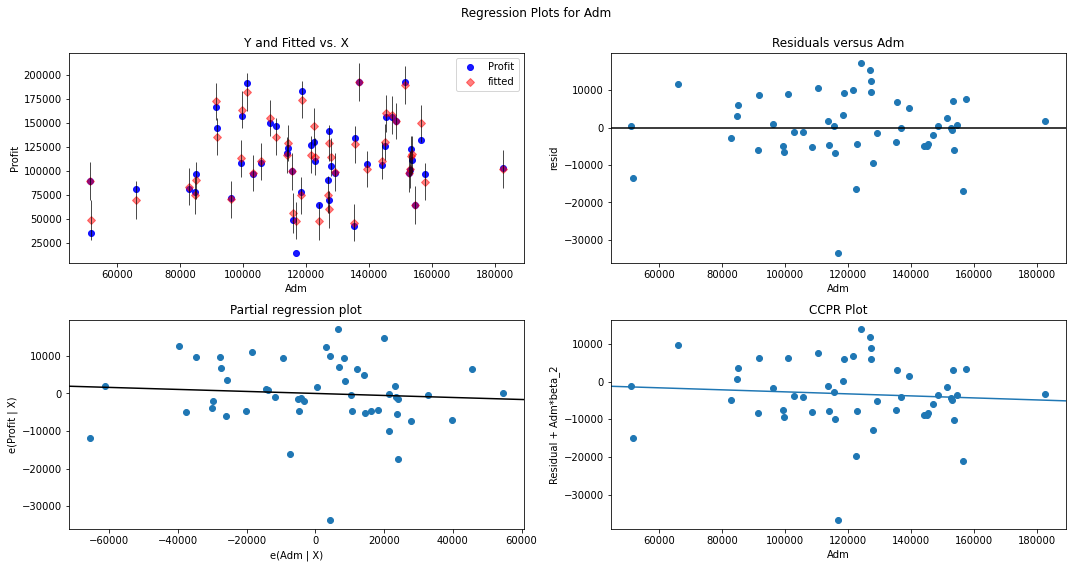

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Adm',fig=fig)
plt.show()

eval_env: 1


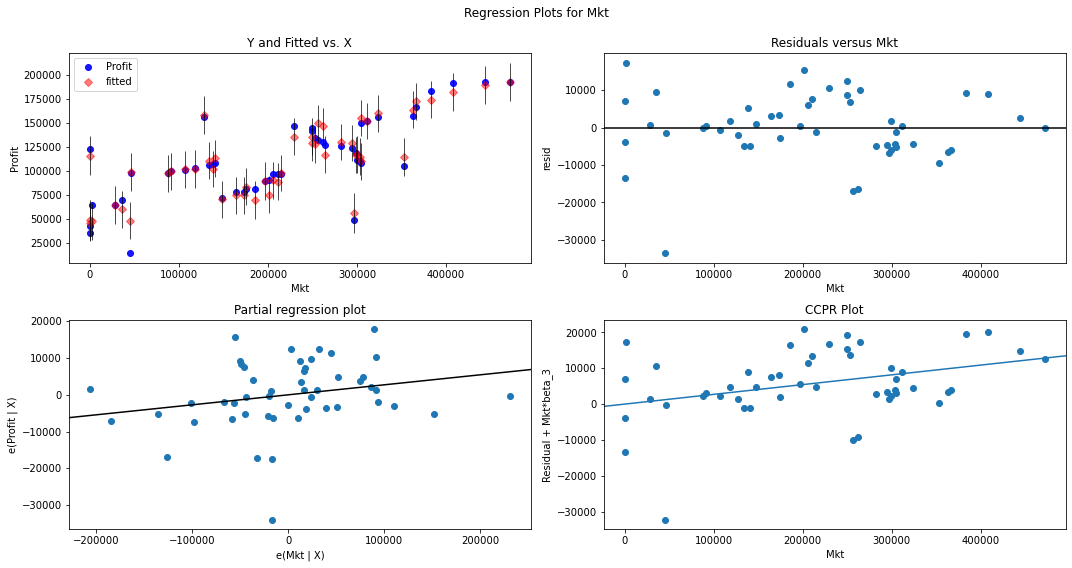

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Mkt',fig=fig)
plt.show()

## checking Outliers or Influencers

In [27]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

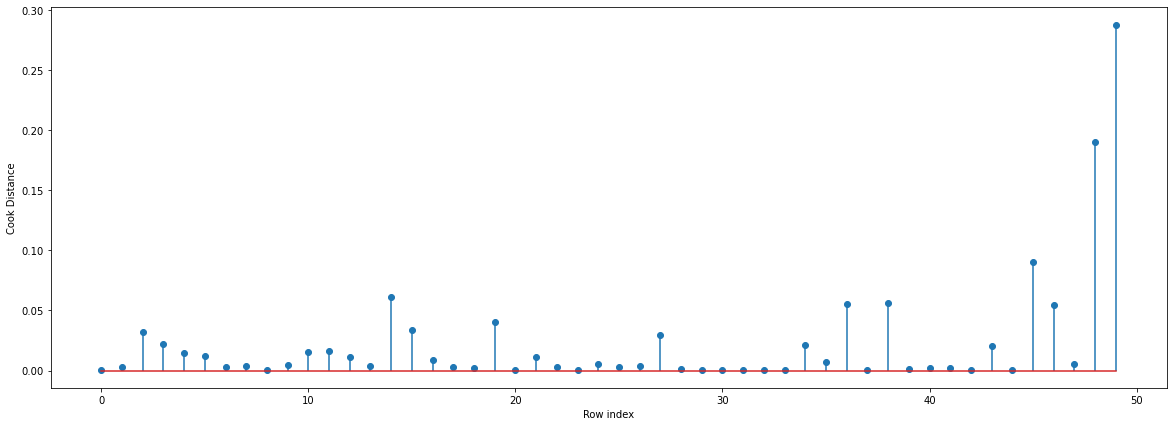

In [28]:
fig = plt.figure(figsize =(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel("Row index")
plt.ylabel("Cook Distance")
plt.show()

In [29]:
np.argmax(c), np.max(c)

(49, 0.28808229275432634)

## High influence plot

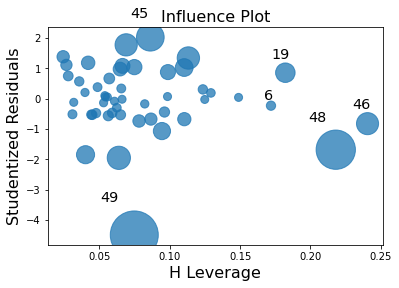

In [30]:

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [31]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [32]:
data[data.index.isin([49])] 

,RD,Adm,Mkt,Profit
49,0.0,116983.8,45173.06,14681.4


## improving model

In [33]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data2

,RD,Adm,Mkt,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


## Model Deletion Diagnostics and Final Model

In [34]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RD+Adm+Mkt",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RD+Adm+Mkt",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.9613162435129847


In [35]:
final_model.rsquared

0.9613162435129847

In [36]:
# say New data for prediction is
new_data=pd.DataFrame({'RD':70000,"Adm":90000,"Mkt":140000},index=[0])
new_data

,RD,Adm,Mkt
0,70000,90000,140000


In [37]:

# Manual Prediction of Price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [38]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

## table containing R^2 value for each prepared model

In [39]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
